# How do the results of this analysis differ from pure association via correlation?

Goal: compare simple correlation of peak accessibility and gene expression to the regression model.

# Overview of files

In [1]:
import pandas as pd

RNA_filt = pd.read_csv("RNA-seq/filtered_RNA_abT_Tact_Stem.csv")

print(RNA_filt.columns)
print(RNA_filt.shape)

RNA_filt.head()



Index(['Unnamed: 0', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.Gut',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM'],
      dtype='object')
(17535, 30)


,Unnamed: 0,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,0610005C13Rik,1.022363,1.389747,1.024819,1.024482,1.026430,1.026217,3.010920,1.024462,1.024819,...,1.025833,1.024819,1.385805,1.025833,1.575395,1.024819,1.096732,1.096732,1.021750,1.021812
1,0610007P14Rik,162.641117,206.945221,209.187788,198.421365,215.056475,225.565360,73.904647,138.841383,139.863904,...,206.241084,205.309922,165.690720,133.234920,127.894194,195.147548,206.053987,246.105317,192.424636,204.298358
2,0610009B22Rik,68.070719,82.468806,89.769337,57.661619,76.399214,84.671456,32.828651,27.207241,36.169759,...,36.105700,34.348965,25.168975,33.305724,29.284365,33.322384,78.272059,78.837030,68.844751,76.418169
3,0610009L18Rik,15.450717,13.573968,14.427620,8.249482,1.683173,4.001953,5.595954,6.367369,6.505833,...,8.645607,7.268431,3.840215,1.025833,6.283540,12.791348,8.577159,16.791386,15.511549,16.947354
4,0610009O20Rik,160.246297,125.475307,155.928005,120.692893,118.433597,149.630866,92.040668,76.781112,87.529814,...,87.608325,56.128251,109.175415,91.992319,102.035627,108.414405,168.645852,157.926022,155.941641,186.261464


In [2]:
import pandas as pd

ATAC = pd.read_csv("ATAC_high_var.csv")

print(ATAC.columns)
print(ATAC.shape)
ATAC.head()


Index(['ImmGenATAC1219.peakID', 'chrom', 'Summit',
       'mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb',
       'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'variance'],
      dtype='object')
(75857, 38)


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,preT.DN1.Th,preT.DN2a.Th,...,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,variance
0,ImmGenATAC1219.peak_69,chr1,4468579,0.00,7.11,1.0,NaN,"Rp1,Sox17",14.81,22.31,...,5.94,0.98,2.75,2.85,1.49,0.41,2.57,3.52,7.89,21.404348
1,ImmGenATAC1219.peak_77,chr1,4490652,0.08,16.20,1.0,NaN,"Rp1,Sox17",59.36,43.17,...,4.29,1.16,1.54,1.19,2.18,9.93,8.79,16.02,47.78,297.171420
2,ImmGenATAC1219.peak_83,chr1,4496479,0.40,23.81,1.0,NaN,"Rp1,Sox17",40.73,28.06,...,41.12,25.50,18.36,16.14,19.20,36.48,28.99,26.03,33.68,182.666600
3,ImmGenATAC1219.peak_84,chr1,4496738,0.14,11.15,1.0,NaN,"Rp1,Sox17",23.05,8.10,...,23.94,12.37,9.06,10.64,9.17,16.15,16.66,17.12,17.28,42.240147
4,ImmGenATAC1219.peak_93,chr1,4547574,0.14,41.55,1.0,NaN,Sox17,20.15,7.29,...,1.07,7.23,3.46,1.20,5.36,0.41,0.71,2.69,5.80,16.024600


In [8]:
# define your rename mapping
rename_map = {
    "T8.IEL.LCMV.d7.Gut": "T8.IEL.LCMV.d7",
    "T8.IEL.LCMV.d7.SI":  "T8.IEL.LCMV.d7"
}

# rename in RNA_filt
RNA_filt = RNA_filt.rename(columns=rename_map)

# rename in ATAC
ATAC = ATAC.rename(columns=rename_map)

# verify it worked
common_cols = set(RNA_filt.columns) & set(ATAC.columns)
print("Now shared columns include:", sorted([c for c in common_cols if "T8.IEL.LCMV.d7" in c]))


Now shared columns include: ['T8.IEL.LCMV.d7']


In [9]:
import pandas as pd

# loading and assigning correct column names
colnames = [
    "GeneName",
    "TranscriptName",
    "Chromosome",
    "Strand",
    "TxStart",
    "TxEnd",
    "CDSStart",
    "CDSEnd",
    "ExonCount",
    "ExonStarts",
    "ExonEnds"
]
anno = pd.read_csv("refFlat",
                   sep="\t",
                   header=None,
                   names=colnames)


print(anno.columns)
print(anno.shape)

anno.head()

Index(['GeneName', 'TranscriptName', 'Chromosome', 'Strand', 'TxStart',
       'TxEnd', 'CDSStart', 'CDSEnd', 'ExonCount', 'ExonStarts', 'ExonEnds'],
      dtype='object')
(47382, 11)


,GeneName,TranscriptName,Chromosome,Strand,TxStart,TxEnd,CDSStart,CDSEnd,ExonCount,ExonStarts,ExonEnds
0,Wdsub1,NM_001159636,chr2,-,59855193,59882606,59855270,59878527,11,"59855193,59858609,59861560,59862619,59862816,5...","59855275,59858750,59861737,59862726,59862857,5..."
1,Rbm18,NM_001159635,chr2,-,36116078,36136704,36117814,36134247,6,"36116078,36120812,36122851,36127214,36134134,3...","36117974,36120898,36122938,36127251,36134263,3..."
2,Prrc2b,NM_001159634,chr2,+,32151147,32234537,32182511,32230742,32,"32151147,32182457,32183122,32185344,32187480,3...","32151291,32182626,32183300,32185447,32187553,3..."
3,Ildr2,NM_001164528,chr1,+,166254138,166316832,166254375,166310795,10,"166254138,166269304,166270498,166291415,166294...","166254466,166269637,166270618,166291472,166294..."
4,Perm1,NM_172417,chr4,+,156215926,156221307,156217000,156220222,4,"156215926,156216716,156219740,156220109,","156215975,156219185,156219866,156221307,"


# Preparation of datasets for correlation analysis

Checking if all genes in the RNA-seq dataset have annotation info in refFlat. 

Renaming the one cell type with a different label on each dataset, so that they can be matched in the downstream analysis.

In [10]:
set1 = set(RNA_filt["Unnamed: 0"].dropna())
set2 = set(anno["GeneName"].dropna())

common   = set1 & set2       # in both
only1    = set1 - set2       # only in df1
only2    = set2 - set1       # only in df2

print(f"Total in RNA_filt: {len(set1)}")
print(f"Total in anno: {len(set2)}")
print(f"Matching transcripts: {len(common)}")
print(f"Only in RNA_filt:          {len(only1)}")
print(f"Only in anno:          {len(only2)}")

Total in RNA_filt: 17535
Total in anno: 26214
Matching transcripts: 16857
Only in RNA_filt:          678
Only in anno:          9357


**678 genes** for which we have transcripts in the RNA data aren't found in the refFlat. Since we can't know the location of these genes, we drop them for the further analysis.

In [6]:
import pandas as pd

# renaming the “Unnamed: 0” column so it’s clear it holds gene symbols
RNA = RNA_filt.rename(columns={"Unnamed: 0": "GeneName"})

# filtering to only those GeneNames that appear in anno.GeneName
valid_genes = set(anno["GeneName"])
RNA = RNA[RNA["GeneName"].isin(valid_genes)].copy()

# resetting the index
RNA.reset_index(drop=True, inplace=True)

# sanity‐check
print(f"Filtered RNA shape: {RNA.shape}")
print(f"Should have dropped 678 rows → {17535 - RNA.shape[0]}")

# Now `RNA` has only the 16857 genes that are in the annotation dataset


Filtered RNA shape: (16857, 30)
Should have dropped 678 rows → 678


In the next cell I tried figuring out if the column "genes.within.100Kb" in the ATAC dataset could be used to assign peaks to genes. The overlap of genes with those measured in the RNA dataset were insuficient, so I ended up not doing it like this.

In [7]:
import pandas as pd

# pull out & split the ATAC gene‐lists
# dropna so empty cells don’t give a [nan] entry
atac_lists = ATAC["genes.within.100Kb"].dropna().str.split(";")

# explode into a single Series of gene names, then dedupe
all_atac_genes = set(atac_lists.explode())

# get the RNA gene set
rna_genes = set(RNA["GeneName"].dropna())

# find the intersection (and also the differences)
common_genes = all_atac_genes & rna_genes
only_in_atac  = all_atac_genes - rna_genes
only_in_rna   = rna_genes - all_atac_genes

print(f"Total unique genes in ATAC lists: {len(all_atac_genes)}")
print(f"Total genes in RNA:             {len(rna_genes)}")
print(f"Overlap (in both):              {len(common_genes)}")
print(f"Only in ATAC lists:             {len(only_in_atac)}")
print(f"Only in RNA:                    {len(only_in_rna)}")


Total unique genes in ATAC lists: 18303
Total genes in RNA:             16857
Overlap (in both):              2396
Only in ATAC lists:             15907
Only in RNA:                    14461


# Calculating spearman correlation

This next cell is for calculating the correlation itself. 

To each peak I assigned the genes within 100 kb upstream and downstream of that peak. 



In [17]:
import pandas as pd
from scipy.stats import pearsonr
from tqdm import tqdm   # for a progress bar

# rename and index RNA by GeneName
RNA = (
    RNA_filt
      .rename(columns={"Unnamed: 0": "GeneName"})
      .set_index("GeneName")
)

# index ATAC by PeakID
ATAC2 = ATAC.set_index("ImmGenATAC1219.peakID")

# pick out only the cell-type columns (they’ll be the intersection)
rna_cells  = set(RNA.columns)
atac_cells = set(ATAC2.columns) - {"chrom","Summit","variance", 
                                   "mm10.60way.phastCons_scores",
                                   "_-log10_bestPvalue",
                                   "Included.in.systematic.analysis",
                                   "TSS","genes.within.100Kb"}
common_cells = sorted(rna_cells & atac_cells)

print(f"Using {len(common_cells)} cell types:", common_cells)

# Make sure TxStart is an integer, and index by GeneName
anno2 = (
    anno
      .assign(TxStart = anno.TxStart.astype(int))
      .set_index("GeneName")
)

# ─── Loop over each peak and compute correlations ───
results = []

for peak_id, peak_row in tqdm(ATAC2.iterrows(), total=len(ATAC2)):
    chrom  = peak_row["chrom"]
    summit = int(peak_row["Summit"])

    # find all genes on the same chromosome within ±100kb
    window_lo = summit - 100_000
    window_hi = summit + 100_000

    nearby = anno2.query(
        "Chromosome == @chrom and @window_lo <= TxStart <= @window_hi"
    ).index.tolist()
    if not nearby:
        continue

    # extract the peak’s accessibility vector once per peak
    x = peak_row[common_cells].values.astype(float)

    # for each nearby gene, pull TxStart safely, then correlate
    for gene in nearby:
        if gene not in RNA.index:
            continue

        # --- pull TxStart and coerce to a single integer ---
        tx = anno2.loc[gene, "TxStart"]
        if isinstance(tx, pd.Series):
            tx = tx.iloc[0]
        tx = int(tx)

        distance = summit - tx

        # pull expression vector and compute Pearson’s r
        y = RNA.loc[gene, common_cells].values.astype(float)
        r, p = pearsonr(x, y)

        results.append({
            "PeakID":          peak_id,
            "GeneName":        gene,
            "chromosome":      chrom,
            "summit":          summit,
            "TxStart":         tx,
            "distance_to_tx":  distance,
            "pearson_r":       r,
            "p_value":         p
        })


# Collect into a DataFrame and adjust FDR
corr_df = pd.DataFrame(results)
from statsmodels.stats.multitest import multipletests

corr_df["q_value"] = multipletests(corr_df["p_value"], method="fdr_bh")[1]

# Quick summary
print(f"Tested {len(corr_df)} peak–gene pairs.")
print("Top positive correlations:\n", corr_df.sort_values("pearson_r", ascending=False).head())
print("Top negative correlations:\n", corr_df.sort_values("pearson_r").head())
print(f"Significant at FDR<0.05: { (corr_df.q_value<0.05).sum() }")



corr_df.to_pickle("peak_gene_correlations_final.pkl")



Using 29 cell types: ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'STHSC.150-.BM', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.IEL.LCMV.d7', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


  3%|▎         | 2058/75857 [00:22<13:41, 89.88it/s] 


KeyboardInterrupt: 

# ** **DELETE LATER** **

A few broad take-aways from what you just ran:

### Scale of the test

- You had 75 857 peaks, each potentially linked to many genes in ±100 kb, and you tested every such peak–gene pair.

- That gave you 443 133 individual Pearson correlations across your 28 cell-type vectors.

### Strong positive hits

- The very top positive correlations are almost perfect (r≈0.99) between certain peaks and certain genes.

- For example, ImmGenATAC1219.peak_495434 (summit at chr9:102 502 202) correlates with Ky (TxStart≈102 506 137, distance≈–3.9 kb) at r=0.99685 (q≈1.7 ×10⁻²⁴).

- Likewise, multiple adjacent peaks around chr4:94.7 Mb all correlate at r≈0.995 with Tek (TxStart≈94 739 288, distance≈–47.9 kb).

### Strong negative hits

- You also see very substantial inverse relationships (r≈–0.87) where—for instance—peak_509214 near Btk (chrX:134 542 340, distance≈+43 kb) is anti-correlated with Btk expression across cell types (q≈1.8 ×10⁻⁷).

- These may point to repressive elements or to peaks whose accessibility marks a cell state in which that gene is downregulated.

### Multiple test correction

- Out of 443 133 tests, 58 730 survived an FDR < 0.05 cutoff.

- That’s still a large number, so you’ll want to further filter by effect size (e.g. |r|>0.5 or >0.7) or by distance if you only care about the very nearest elements.

### Weird TxStart/distance entries

- You’ll notice in the printout that under TxStart and distance_to_tx, some cells look like little data-frames rather than single numbers.

- That’s because in the loop you used anno2.at[gene, "TxStart"] on an index that (after your earlier .query(...)) was actually a multi-index or duplicated entry.

In [13]:
import pandas as pd
corr_df = pd.read_pickle("peak_gene_correlations_final.pkl")


C:\Users\gusta\AppData\Local\Temp\ipykernel_34684\985968616.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\gusta\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


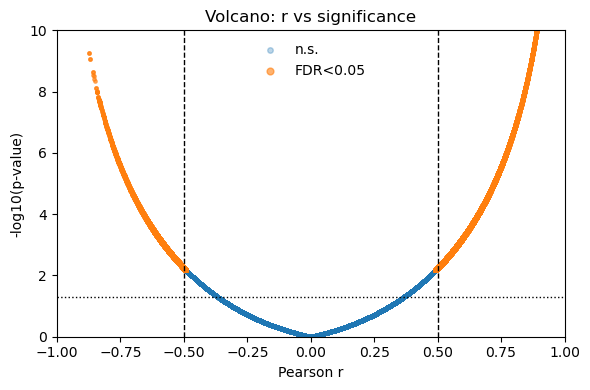

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r = corr_df["pearson_r"].values
neglogp = -np.log10(corr_df["p_value"].values)
sig   = corr_df["q_value"] < 0.05

plt.figure(figsize=(6,4))
plt.scatter(r[~sig], neglogp[~sig], s=4, alpha=0.3, label="n.s.")
plt.scatter(r[sig],  neglogp[sig],  s=6, alpha=0.6, label="FDR<0.05")
plt.axvline( 0.5, color="k", linestyle="--", linewidth=1)
plt.axvline(-0.5, color="k", linestyle="--", linewidth=1)
plt.axhline( 1.3, color="k", linestyle=":",  linewidth=1)
plt.ylim(0, 10)   # focus on p ≥ 1e-10
plt.xlim(-1,1)
plt.xlabel("Pearson r")
plt.ylabel("-log10(p-value)")
plt.title("Volcano: r vs significance")
plt.legend(markerscale=2, frameon=False)
plt.tight_layout()
plt.show()


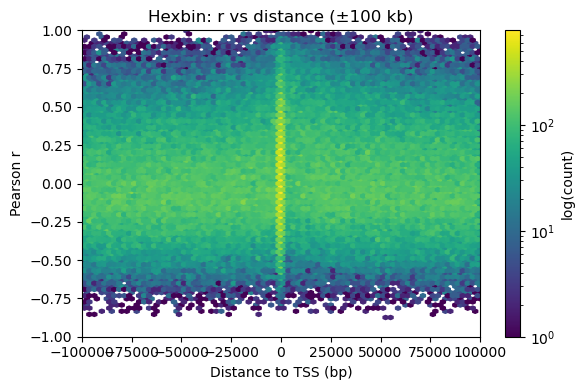

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the two vectors
dist = corr_df["distance_to_tx"].values
r    = corr_df["pearson_r"].values

# Mask to ±100 kb
mask = np.abs(dist) <= 100_000

# Plot only the masked points, with a colorbar
plt.figure(figsize=(6,4))
hb = plt.hexbin(
    dist[mask],
    r[mask],
    gridsize=80,
    mincnt=1,
    bins="log",      # color = log(count)
    cmap="viridis"
)
cb = plt.colorbar(hb)
cb.set_label("log(count)")

# Axis limits and labels
plt.xlim(-100_000, 100_000)
plt.ylim(-1, 1)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Pearson r")
plt.title("Hexbin: r vs distance (±100 kb)")

plt.tight_layout()
plt.show()


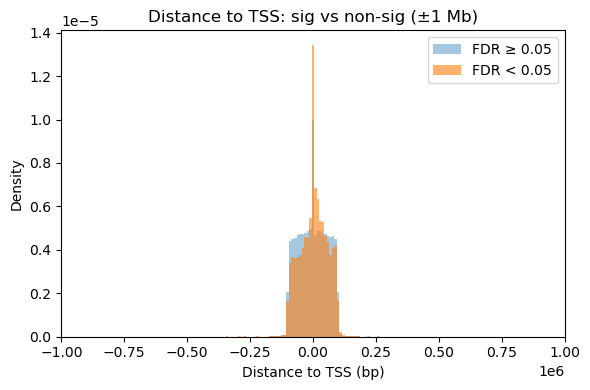

In [ ]:
sig = corr_df["q_value"] < 0.05

plt.figure(figsize=(6,4))
plt.hist(
    corr_df.loc[~sig, "distance_to_tx"],
    bins=np.linspace(-1e6, 1e6, 200),
    density=True,
    alpha=0.4,
    label="FDR ≥ 0.05"
)
plt.hist(
    corr_df.loc[sig, "distance_to_tx"],
    bins=np.linspace(-1e6, 1e6, 200),
    density=True,
    alpha=0.6,
    label="FDR < 0.05"
)
plt.xlim(-1e6, 1e6)
plt.xlabel("Distance to TSS (bp)")
plt.ylabel("Density")
plt.title("Distance to TSS: sig vs non-sig (±1 Mb)")
plt.legend()
plt.tight_layout()
plt.show()


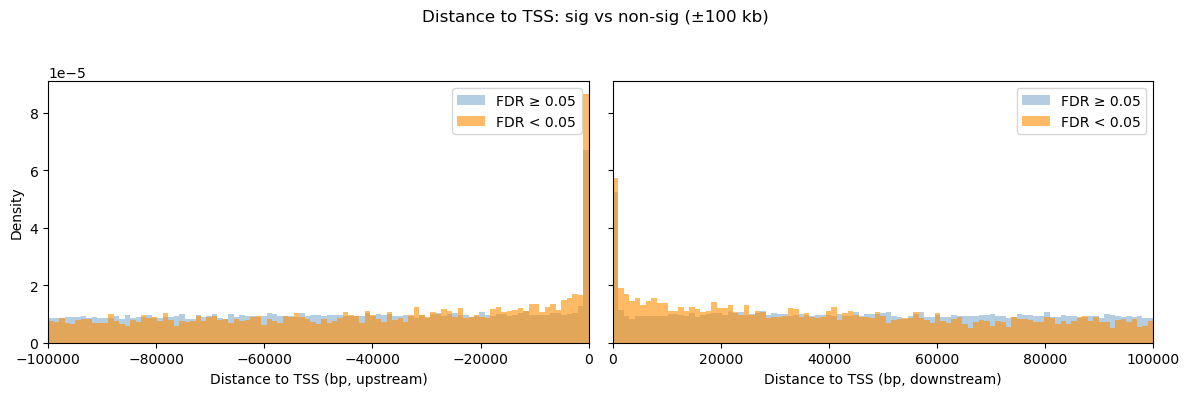

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sig = corr_df["q_value"] < 0.05
dist = corr_df["distance_to_tx"].values

# Define the ±100 kb window
maxd = 100_000

# Masks
neg_mask = (dist < 0) & (dist >= -maxd)
pos_mask = (dist > 0) & (dist <=  maxd)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

bins = np.linspace(-maxd, 0, 100)   # 100 bins for the negative side
# Left: negative distances
axes[0].hist(
    dist[neg_mask & ~sig],
    bins=bins,
    density=True,
    alpha=0.4,
    label="FDR ≥ 0.05",
    color="steelblue"
)
axes[0].hist(
    dist[neg_mask &  sig],
    bins=bins,
    density=True,
    alpha=0.6,
    label="FDR < 0.05",
    color="darkorange"
)
axes[0].set_xlim(-maxd, 0)
axes[0].set_xlabel("Distance to TSS (bp, upstream)")
axes[0].set_ylabel("Density")
axes[0].legend()

# Right: positive distances
bins = np.linspace(0, maxd, 100)
axes[1].hist(
    dist[pos_mask & ~sig],
    bins=bins,
    density=True,
    alpha=0.4,
    label="FDR ≥ 0.05",
    color="steelblue"
)
axes[1].hist(
    dist[pos_mask &  sig],
    bins=bins,
    density=True,
    alpha=0.6,
    label="FDR < 0.05",
    color="darkorange"
)
axes[1].set_xlim(0, maxd)
axes[1].set_xlabel("Distance to TSS (bp, downstream)")
axes[1].legend()

fig.suptitle("Distance to TSS: sig vs non-sig (±100 kb)")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


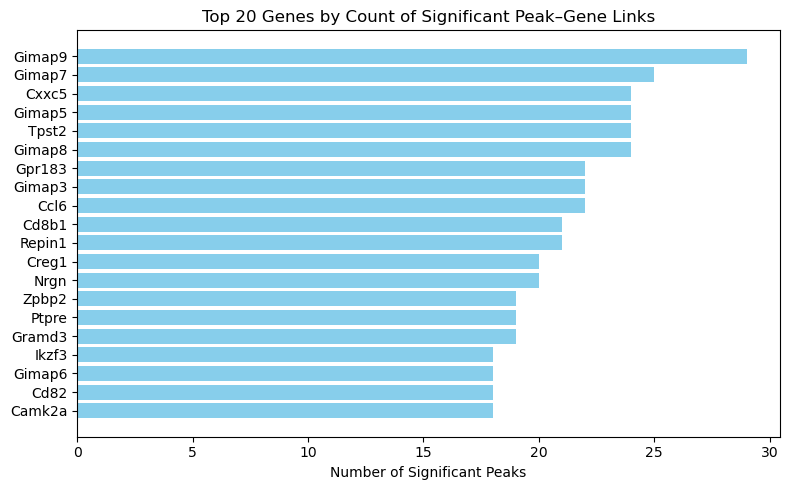

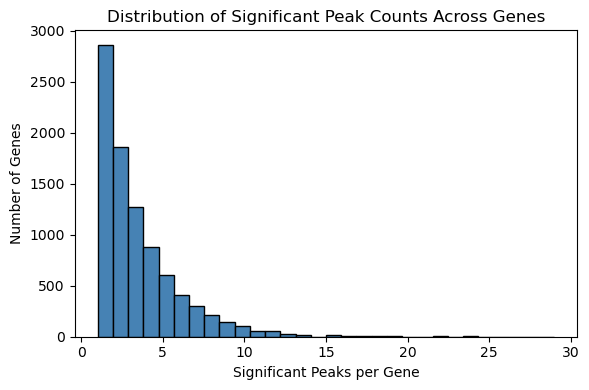

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

corr_df = pd.read_pickle("peak_gene_correlations_final.pkl")

# Select only the significant correlations (FDR < 0.05)
sig_df = corr_df[corr_df["q_value"] < 0.05]

# Count distinct peaks per gene
peaks_per_gene = (
    sig_df
      .groupby("GeneName")          # group by gene symbol
      .PeakID
      .nunique()                    # count unique peaks per gene
      .sort_values(ascending=False)
)

# Bar plot: top 20 genes with the most peaks
top20 = peaks_per_gene.head(20)
plt.figure(figsize=(8, 5))
plt.barh(top20.index[::-1], top20.values[::-1], color="skyblue")
plt.xlabel("Number of Significant Peaks")
plt.title("Top 20 Genes by Count of Significant Peak–Gene Links")
plt.tight_layout()
plt.show()

# Histogram: distribution over *all* genes
plt.figure(figsize=(6, 4))
plt.hist(peaks_per_gene.values, bins=30, color="steelblue", edgecolor="k")
plt.xlabel("Significant Peaks per Gene")
plt.ylabel("Number of Genes")
plt.title("Distribution of Significant Peak Counts Across Genes")
plt.tight_layout()
plt.show()


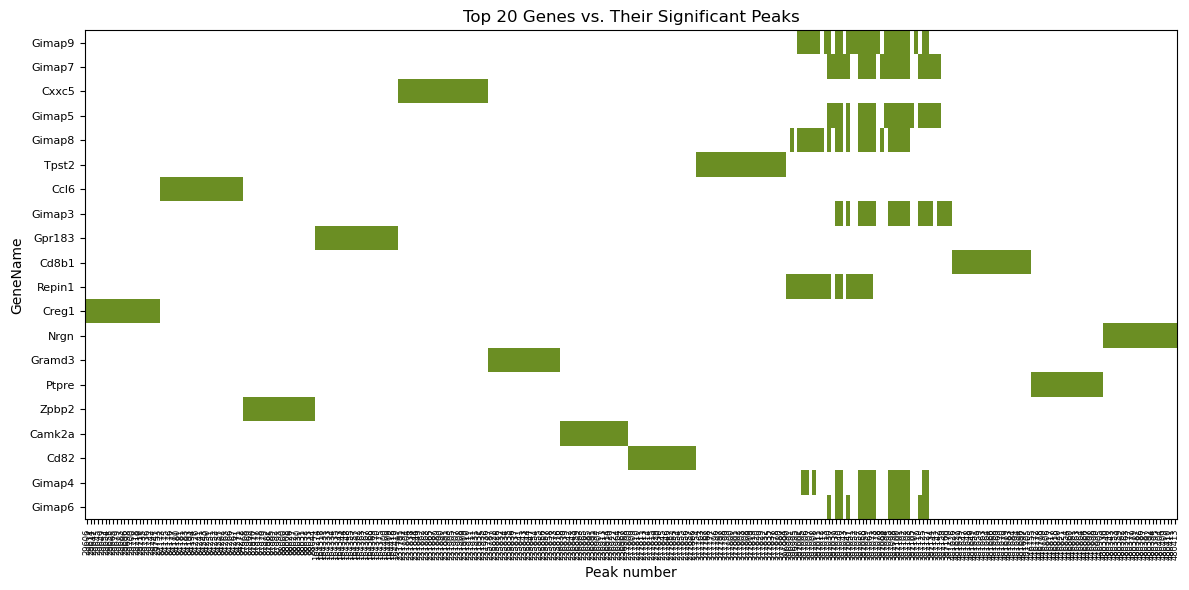

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Subset to significant peak–gene pairs (FDR < 0.05)
sig_df = corr_df[corr_df["q_value"] < 0.05]

# Find the top 20 genes by number of significant peaks
peaks_per_gene = sig_df.groupby("GeneName")["PeakID"].nunique()
top_genes      = peaks_per_gene.nlargest(20).index.tolist()

# Collect all unique peaks linked to those genes
subset     = sig_df[sig_df["GeneName"].isin(top_genes)]
all_peaks  = subset["PeakID"].unique().tolist()

# Build the presence/absence matrix (genes × peaks)
mat = np.zeros((len(top_genes), len(all_peaks)), dtype=int)
for i, gene in enumerate(top_genes):
    linked = subset.loc[subset["GeneName"] == gene, "PeakID"].unique()
    for p in linked:
        j = all_peaks.index(p)
        mat[i, j] = 1

# Shorten peak labels (drop the “ImmGenATAC1219.peak_” prefix)
short_peaks = [p.split("_")[-1] for p in all_peaks]

# Plot, with olivedrab for presence, no colorbar
cmap = ListedColormap(["white", "olivedrab"])
plt.figure(figsize=(12, 6))
plt.imshow(mat, aspect="auto", cmap=cmap, interpolation="nearest")

# y-axis: gene names
plt.yticks(np.arange(len(top_genes)), top_genes, fontsize=8)
# x-axis: short peak IDs
plt.xticks(np.arange(len(short_peaks)), short_peaks, fontsize=6, rotation=90)

plt.xlabel("Peak number")
plt.ylabel("GeneName")
plt.title("Top 20 Genes vs. Their Significant Peaks")
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd

lasso_results = pd.read_csv("regression_results.csv")

print(lasso_results.shape)
lasso_results.head()

(56848, 5)


,Unnamed: 0,gene,peak_ID,coefficient,r2
0,0,Rp1,ImmGenATAC1219.peak_77,-0.012807,0.078561
1,1,Sox17,ImmGenATAC1219.peak_77,-0.003475,0.054538
2,2,Sox17,ImmGenATAC1219.peak_83,-0.001693,0.054538
3,3,Sox17,ImmGenATAC1219.peak_96,-0.003925,0.054538
4,4,Tcea1,ImmGenATAC1219.peak_137,0.922185,0.478855


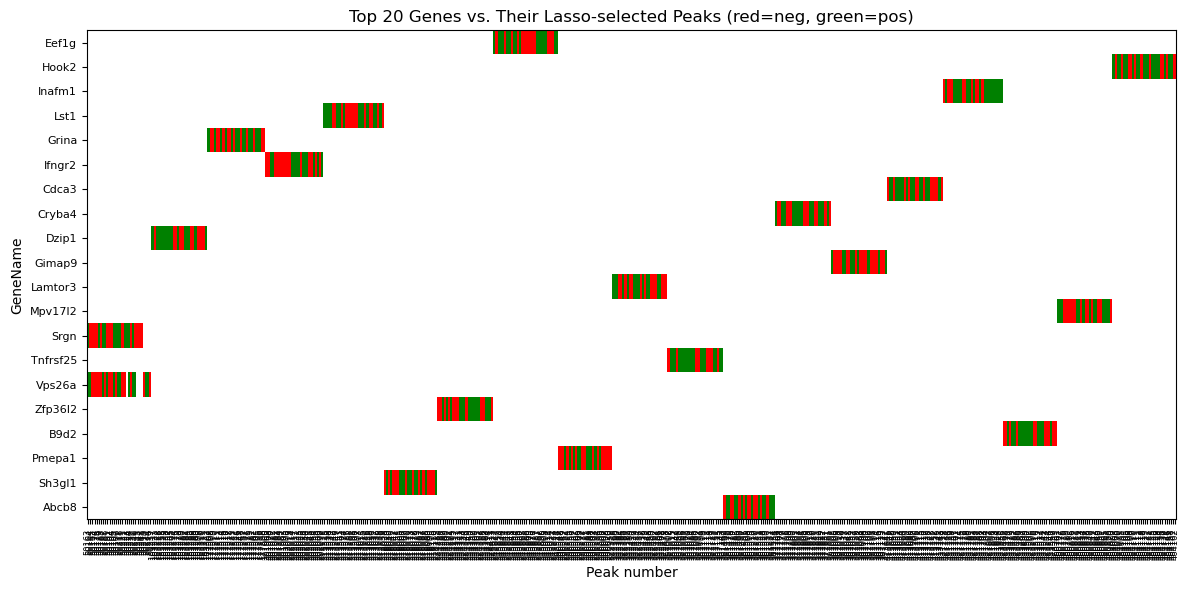

Peak–Gene–Coefficient relations in plotted matrix:

                   peak_ID     gene  coefficient
ImmGenATAC1219.peak_163217    Dzip1     1.029407
ImmGenATAC1219.peak_163221    Dzip1   -10.161549
ImmGenATAC1219.peak_163222    Dzip1     0.222031
ImmGenATAC1219.peak_163228    Dzip1     6.095708
ImmGenATAC1219.peak_163233    Dzip1     7.030634
ImmGenATAC1219.peak_163235    Dzip1     0.130639
ImmGenATAC1219.peak_163238    Dzip1     7.130291
ImmGenATAC1219.peak_163252    Dzip1     2.652121
ImmGenATAC1219.peak_163253    Dzip1     0.280987
ImmGenATAC1219.peak_163265    Dzip1     1.512400
ImmGenATAC1219.peak_163274    Dzip1    -4.021976
ImmGenATAC1219.peak_163275    Dzip1    -1.380145
ImmGenATAC1219.peak_163278    Dzip1     3.277249
ImmGenATAC1219.peak_163279    Dzip1    -6.669200
ImmGenATAC1219.peak_163280    Dzip1    -7.283398
ImmGenATAC1219.peak_163281    Dzip1     0.369381
ImmGenATAC1219.peak_163284    Dzip1     0.792408
ImmGenATAC1219.peak_163285    Dzip1     1.250750
ImmGenATAC1219.pe

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# pick top 20 genes by R²
top_genes = (
    lasso_results
    .groupby('gene')['r2']
    .first()                   # each gene’s R² is constant in that df
    .nlargest(20)
    .index
    .tolist()
)


# Filter to non-zero coefficients
nz = lasso_results[lasso_results['coefficient'] != 0].copy()

# 2) Find top 20 genes by count of peaks
peak_counts = nz.groupby('gene')['peak_ID'].nunique()
top_genes   = peak_counts.nlargest(20).index.tolist()

# Subset to just those genes
sub = nz[nz['gene'].isin(top_genes)].copy()

# All peaks that appear for those genes
all_peaks = sub['peak_ID'].unique().tolist()

# Build matrix: rows=genes, cols=peaks, vals = sign(coef)
mat = np.zeros((len(top_genes), len(all_peaks)), dtype=int)
# map peak → col index
peak_to_j = {p: j for j,p in enumerate(all_peaks)}

for i,gene in enumerate(top_genes):
    dfg = sub[sub['gene'] == gene]
    for p,coef in zip(dfg['peak_ID'], dfg['coefficient']):
        j = peak_to_j[p]
        mat[i,j] = 1 if coef > 0 else -1

# Plot with red=neg, white=zero, green=pos
cmap = ListedColormap(['red','white','green'])
bounds = [-1.5, -0.5, 0.5, 1.5]
norm   = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12,6))
plt.imshow(mat, aspect='auto', cmap=cmap, norm=norm, interpolation='nearest')

# ticks
plt.yticks(np.arange(len(top_genes)), top_genes, fontsize=8)
plt.xticks(np.arange(len(all_peaks)), [p.split('_')[-1] for p in all_peaks],
           fontsize=6, rotation=90)

plt.xlabel("Peak number")
plt.ylabel("GeneName")
plt.title("Top 20 Genes vs. Their Lasso‐selected Peaks (red=neg, green=pos)")
plt.tight_layout()
plt.show()


# Build and display the list of (peak → gene, coefficient)
#    sorted by peak, then gene
rel_list = sub[['peak_ID','gene','coefficient']] \
           .sort_values(['peak_ID','gene']) \
           .reset_index(drop=True)

print("Peak–Gene–Coefficient relations in plotted matrix:\n")
print(rel_list.to_string(index=False))


In [ ]:
import pandas as pd

# Rename & subset the ATAC info to just our plotted peaks
peak_info = (
    ATAC
    .rename(columns={'ImmGenATAC1219.peakID':'peak_ID'})
    [['peak_ID','chrom','Summit']]
    .query("peak_ID in @all_peaks")
)

# Merge with the Lasso‐relations
m = (
    sub[['gene','peak_ID']]
    .drop_duplicates()
    .merge(peak_info, on='peak_ID', how='left')
)

# For each gene (and chromosome), find min/max summit
rows = []
for (gene, chrom), grp in m.groupby(['gene','chrom']):
    # sort by summit to establish “first” and “last”
    g = grp.sort_values('Summit')
    first_peak, last_peak = g.iloc[0]['peak_ID'], g.iloc[-1]['peak_ID']
    start, end = g.iloc[0]['Summit'], g.iloc[-1]['Summit']
    rows.append({
        'gene':       gene,
        'chrom':      chrom,
        'first_peak': first_peak,
        'last_peak':  last_peak,
        'start_summit': start,
        'end_summit':   end,
        'distance_bp': end - start
    })

distances = pd.DataFrame(rows)

print(distances.to_string(index=False))


    gene chrom                 first_peak                  last_peak  start_summit  end_summit  distance_bp
   Abcb8  chr5 ImmGenATAC1219.peak_361462 ImmGenATAC1219.peak_361534      24303393    24452033       148640
    B9d2  chr7 ImmGenATAC1219.peak_423456 ImmGenATAC1219.peak_423559      25606666    25776953       170287
   Cdca3  chr6 ImmGenATAC1219.peak_413641 ImmGenATAC1219.peak_413743     124730323   124918004       187681
  Cryba4  chr5 ImmGenATAC1219.peak_377754 ImmGenATAC1219.peak_377861     112220413   112343357       122944
   Dzip1 chr14 ImmGenATAC1219.peak_163217 ImmGenATAC1219.peak_163322     118823518   119007640       184122
   Eef1g chr19 ImmGenATAC1219.peak_245823 ImmGenATAC1219.peak_245924       8871519     9066402       194883
  Gimap9  chr6 ImmGenATAC1219.peak_397002 ImmGenATAC1219.peak_397127      48579587    48770945       191358
   Grina chr15 ImmGenATAC1219.peak_177507 ImmGenATAC1219.peak_177600      76190035    76343501       153466
   Hook2  chr8 ImmGenATAC121

In [ ]:
import pandas as pd

hcf = pd.read_csv("high_conf_filtered.csv")

hcf.head()

,Unnamed: 0,gene,peak_ID,coefficient,r2,distance_to_tss,role
0,13,Pcmtd1,ImmGenATAC1219.peak_376,-1.367742,0.752231,394.0,repressor
1,14,Pcmtd1,ImmGenATAC1219.peak_377,-2.494725,0.752231,144.0,repressor
2,15,Pcmtd1,ImmGenATAC1219.peak_378,3.276884,0.752231,132.0,promoter
3,16,Pcmtd1,ImmGenATAC1219.peak_380,5.020475,0.752231,7143.0,activator
4,17,Pcmtd1,ImmGenATAC1219.peak_408,0.983100,0.752231,58306.0,activator


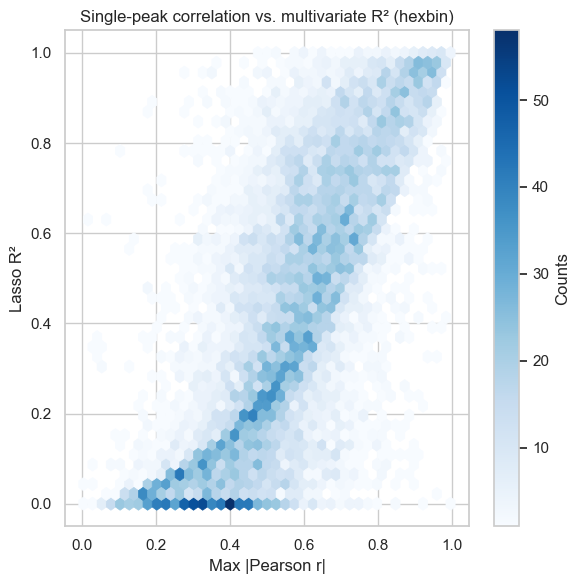

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Per gene: max |r|
corr_max = (
    corr_df
    .groupby("GeneName")["pearson_r"]
    .agg(lambda arr: np.max(np.abs(arr)))
    .rename("max_abs_r")
)

# Per gene: R² from lasso_results
lasso_r2 = (
    lasso_results
    .groupby("gene")["r2"]
    .first()
    .rename("r2")
)

df = pd.concat([corr_max, lasso_r2], axis=1).dropna()

# Hexbin plot
plt.figure(figsize=(6,6))
hb = plt.hexbin(
    df["max_abs_r"],
    df["r2"],
    gridsize=40,
    mincnt=1,
    cmap='Blues',
    linewidths=0.5
)
cb = plt.colorbar(hb)
cb.set_label('Counts')

plt.xlabel("Max |Pearson r|")
plt.ylabel("Lasso R²")
plt.title("Single-peak correlation vs. multivariate R² (hexbin)")
plt.tight_layout()
plt.show()


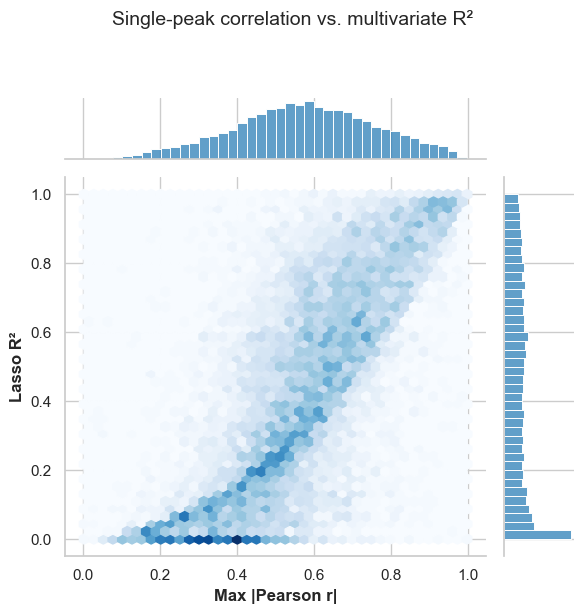

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Rebuild df as before
corr_max = (
    corr_df
    .groupby("GeneName")["pearson_r"]
    .agg(lambda arr: np.max(np.abs(arr)))
    .rename("max_abs_r")
)
lasso_r2 = (
    lasso_results
    .groupby("gene")["r2"]
    .first()
    .rename("r2")
)
df = pd.concat([corr_max, lasso_r2], axis=1).dropna()

# Using Seaborn’s jointplot with custom marginal bar color
sns.set_theme(style="whitegrid")
g = sns.jointplot(
    data=df,
    x="max_abs_r",
    y="r2",
    kind="hex",
    height=6,
    gridsize=40,
    cmap="Blues",
    marginal_kws=dict(bins=40, color="#2c7fb8")  # deeper, more saturated blue
)

# Labels & title
g.set_axis_labels("Max |Pearson r|", "Lasso R²", fontweight='bold')
plt.suptitle(
    "Single-peak correlation vs. multivariate R²\n",
    y=1.02,
    fontsize=14
)

plt.tight_layout()
plt.show()


# **DELETE LATER**

This hex‐binned joint view really crystallizes how your simple Pearson‐based screening and your multivariate Lasso modeling relate—and differ—in practice:

---

## 1. A strong overall correlation

You can see a **clear upward trend**: genes whose expression has a stronger single‐peak correlation almost always end up with higher multivariate R². That makes sense—if one peak on its own explains a lot of variance, a Lasso model that includes it (and maybe a few others) will naturally explain a large fraction of the variability.

---

## 2. The “parabolic” lower‐bound curve

Notice the fuzzy **curved boundary** hugging the bottom-left, roughly tracing a parabola from (0,0) through (1,1). This is exactly what you’d expect if your Lasso model sometimes uses *only* that single best peak: in an ordinary two-variable regression (one predictor), R² = r².

* Genes on that lower boundary are ones where Lasso effectively fell back on the single strongest-correlating peak, so R² ≃ (max |r|)².
* Points **below** that curve (near R²≈0 for moderate r) tended to have their “best” peak shrunk to zero—Lasso deemed it spurious when balanced against its penalty, driving R² down to essentially zero.

---

## 3. Multivariate “lift” above the curve

Between r ≈ 0.3–0.6 you see a **wide vertical spread**—many genes have moderate max |r| but R² ranging from near zero up to 0.9.

* **High-R² outliers**: here Lasso has combined multiple mid-strength peaks into a model that far outperforms any single feature.
* **Low-R² cases**: these are single-feature correlations that didn’t generalize once penalized—often driven by outliers or noise.

---

## 4. What this says about robustness

* **Pearson correlation** is a terrific *screening* tool to fish out the single most predictive peaks, but it’s **univariate**, blind to redundancy, and **sensitive to outliers**.
* **Lasso regression**, by contrast, is **multivariate** and **regularized**:

  * It can **aggregate** many small-effect peaks when they collectively matter.
  * It can **shrink away** spurious correlations that don’t survive the cross-feature penalty.

So in terms of **reliability** for building a predictive model of gene expression, the Lasso results are generally more robust—especially for genes driven by multiple distal elements. But for quickly flagging your very strongest single‐peak signals, the simple Pearson approach remains fast and informative.


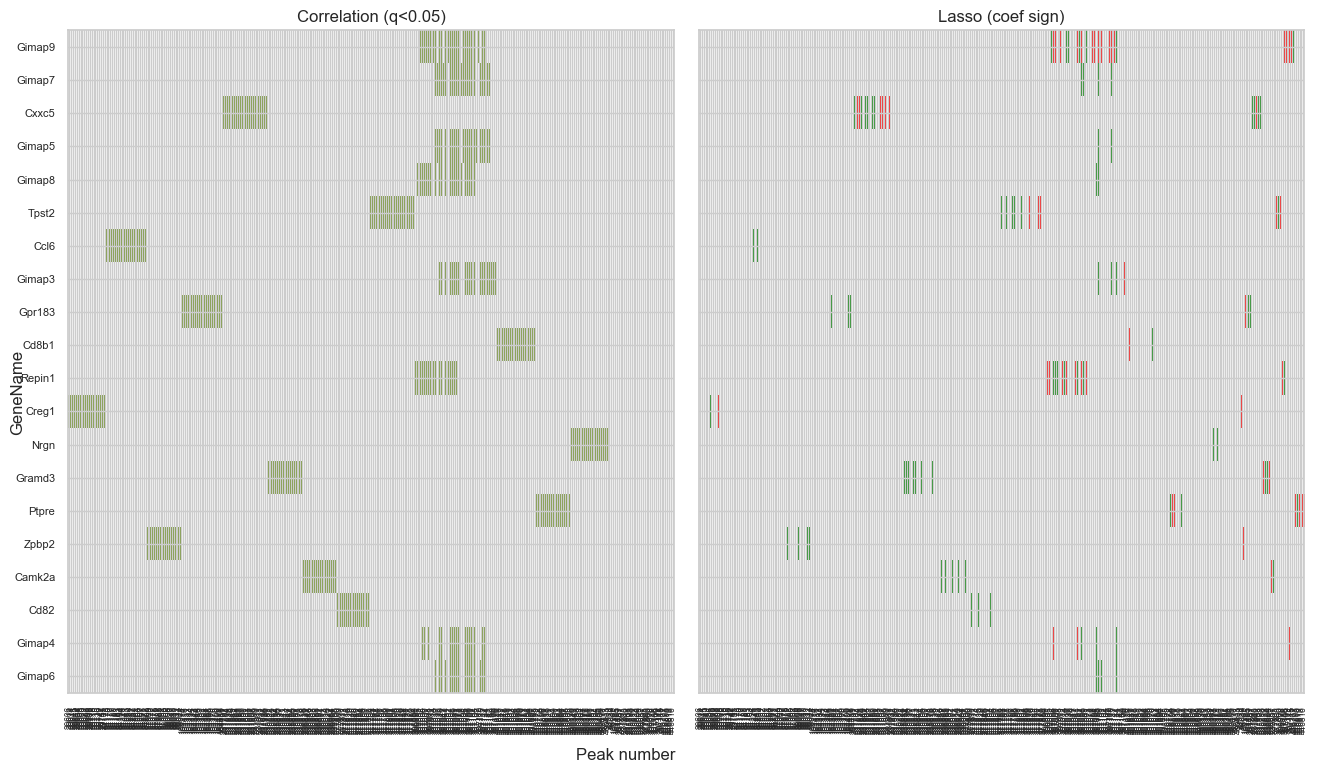

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Identify top 20 genes by number of significant correlations
sig_df = corr_df[corr_df.q_value < 0.05]
top_genes = (
    sig_df.groupby("GeneName")["PeakID"]
    .nunique()
    .nlargest(20)
    .index
    .tolist()
)

# Subset both result tables to those genes
corr_sub  = sig_df[sig_df.GeneName.isin(top_genes)]
lasso_sub = lasso_results[
    (lasso_results.gene.isin(top_genes)) & 
    (lasso_results.coefficient != 0)
]

# Build the union of peaks to plot (preserves order)
corr_peaks  = corr_sub["PeakID"].unique().tolist()
lasso_peaks = lasso_sub["peak_ID"].unique().tolist()
all_peaks   = corr_peaks + [p for p in lasso_peaks if p not in corr_peaks]
short_labels = [p.split("_")[-1] for p in all_peaks]

# Build matrices: rows=genes, cols=peaks
nG, nP = len(top_genes), len(all_peaks)
mat_corr  = np.zeros((nG, nP), dtype=int)
mat_lasso = np.zeros((nG, nP), dtype=int)
peak_to_j = {p:j for j,p in enumerate(all_peaks)}

for i, g in enumerate(top_genes):
    for p in corr_sub.loc[corr_sub.GeneName==g, "PeakID"].unique():
        mat_corr[i, peak_to_j[p]] = 1
    for _, row in lasso_sub[lasso_sub.gene==g].iterrows():
        j = peak_to_j[row.peak_ID]
        mat_lasso[i, j] = 1 if row.coefficient>0 else -1

# Plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=True)

# Correlation heatmap
cmap_corr = ListedColormap(["white","olivedrab"])
ax1.imshow(mat_corr, aspect="auto", cmap=cmap_corr, interpolation="nearest")
ax1.set_title("Correlation (q<0.05)")

# Lasso heatmap
cmap_lasso = ListedColormap(["red","white","green"])
norm_lasso = BoundaryNorm([-1.5, -0.5, 0.5, 1.5], cmap_lasso.N)
ax2.imshow(mat_lasso, aspect="auto", cmap=cmap_lasso, norm=norm_lasso, interpolation="nearest")
ax2.set_title("Lasso (coef sign)")

# Shared ticks & labels
for ax in (ax1, ax2):
    ax.set_xticks(np.arange(nP))
    ax.set_xticklabels(short_labels, rotation=90, fontsize=6)
ax1.set_yticks(np.arange(nG))
ax1.set_yticklabels(top_genes, fontsize=8)

fig.text(0.5, 0.04, "Peak number", ha="center")
fig.text(0.06, 0.5, "GeneName", va="center", rotation="vertical")
plt.tight_layout(rect=[0.05,0.05,1,1])
plt.show()


We pick the same 20 genes from your correlation results.

We take the union of peaks that either had q < 0.05 or non-zero Lasso coefficient for those genes.

mat_corr: 1 if correlation significant, 0 otherwise.

mat_lasso: +1 for positive coefficients, –1 for negative, 0 if not selected.

Two imshow panels share axes so you can directly compare presence/absence patterns side by side.

__

If a peak was only significant in correlation, you’ll see it in the left panel (olive) but blank in the right.

If a peak was only picked up by Lasso, you’ll see it in the right panel (red/green) but blank in the left.

If a peak passed both criteria, you see marks in both panels.

In [ ]:
import numpy as np
import pandas as pd

# Top 1000 peaks by correlation
# For each peak, get its strongest absolute Pearson r across all genes
peak_corr = (
    corr_df
    .groupby("PeakID")["pearson_r"]
    .agg(lambda arr: np.max(np.abs(arr)))
    .rename("max_abs_r")
)
top1000_corr = peak_corr.nlargest(1000).index.tolist()

# Top 1000 peaks by regression R²
# For each peak, get the highest R² of any gene model it appears in
peak_r2 = (
    lasso_results
    .groupby("peak_ID")["r2"]
    .max()
    .rename("max_r2")
)
top1000_r2 = peak_r2.nlargest(1000).index.tolist()

# Compute their intersection
set_corr = set(top1000_corr)
set_r2   = set(top1000_r2)

mutual = set_corr & set_r2

print(f"Number of peaks in top 1000 by corr AND top 100 by r²: {len(mutual)}")
print("They are:")
for p in sorted(mutual):
    print(" ", p)


Number of peaks in top 1000 by corr AND top 100 by r²: 63
They are:
  ImmGenATAC1219.peak_128846
  ImmGenATAC1219.peak_128855
  ImmGenATAC1219.peak_14804
  ImmGenATAC1219.peak_164322
  ImmGenATAC1219.peak_195442
  ImmGenATAC1219.peak_213615
  ImmGenATAC1219.peak_219750
  ImmGenATAC1219.peak_237258
  ImmGenATAC1219.peak_237259
  ImmGenATAC1219.peak_237279
  ImmGenATAC1219.peak_244884
  ImmGenATAC1219.peak_279384
  ImmGenATAC1219.peak_279400
  ImmGenATAC1219.peak_279423
  ImmGenATAC1219.peak_288713
  ImmGenATAC1219.peak_31169
  ImmGenATAC1219.peak_31174
  ImmGenATAC1219.peak_312146
  ImmGenATAC1219.peak_312148
  ImmGenATAC1219.peak_345367
  ImmGenATAC1219.peak_345368
  ImmGenATAC1219.peak_345389
  ImmGenATAC1219.peak_345392
  ImmGenATAC1219.peak_345393
  ImmGenATAC1219.peak_345397
  ImmGenATAC1219.peak_357061
  ImmGenATAC1219.peak_357066
  ImmGenATAC1219.peak_37823
  ImmGenATAC1219.peak_37829
  ImmGenATAC1219.peak_397005
  ImmGenATAC1219.peak_449230
  ImmGenATAC1219.peak_449270
  ImmGenA

In [ ]:
import pandas as pd

mutual_list = sorted(mutual)

# Correlation‐linked genes
corr_hits = (
    corr_df[corr_df['PeakID'].isin(mutual_list)]
    [['PeakID','GeneName','pearson_r','q_value']]
)

# Lasso‐linked genes
lasso_hits = (
    lasso_results[lasso_results['peak_ID'].isin(mutual_list)]
    .rename(columns={'peak_ID':'PeakID','gene':'GeneName'})
    [['PeakID','GeneName','coefficient','r2']]
)

# Build a summary table
summary = pd.DataFrame({'PeakID': mutual_list})

# For each peak, collect the sets of genes from each method
summary['corr_genes'] = summary['PeakID'].apply(
    lambda p: corr_hits.loc[corr_hits['PeakID']==p, 'GeneName']
                     .unique()
                     .tolist()
)
summary['lasso_genes'] = summary['PeakID'].apply(
    lambda p: lasso_hits.loc[lasso_hits['PeakID']==p, 'GeneName']
                        .unique()
                        .tolist()
)

# Expand so one row per (peak, gene, method)
expanded = (
    pd.concat([
        corr_hits.assign(method='correlation'),
        lasso_hits.assign(method='lasso')
    ], ignore_index=True)
    .query("PeakID in @mutual_list")
    .loc[:, ['PeakID','method','GeneName']]
    .drop_duplicates()
    .sort_values(['PeakID','method','GeneName'])
)

print("Summary per peak:")
print(summary.to_string(index=False))
print("\nLong form (one row per peak–gene–method):")
print(expanded.to_string(index=False))


Summary per peak:
                    PeakID                                                                                                                    corr_genes                                                               lasso_genes
ImmGenATAC1219.peak_128846                                                                                                  [Susd3, Card19, Fgd3, Ninj1]                                                                   [Ninj1]
ImmGenATAC1219.peak_128855                                                                                                  [Susd3, Card19, Fgd3, Ninj1]                                              [Ninj1, Susd3, Card19, Fgd3]
 ImmGenATAC1219.peak_14804                                                                                                              [Arl4c, Gm19589]                                                                   [Arl4c]
ImmGenATAC1219.peak_164322                                                